In [4]:
import pandas as pd
import re

In [5]:
with open("cbk-zam/cbk-zam-train.txt", 'r') as f:
    txt = []
    for token in f:
        txt.append(token)              #getting the file

In [6]:
sents = {}
k = 1
for tok in txt:
    if tok != '\n':
        sents.setdefault(k, []).append(tok)
    elif tok == '\n':
        k += 1                  #creating a dict of all the individual instances

In [7]:
len(sents)

1736

In [8]:
values = []
for key, value in sents.items():
    listval = []
    for token in value:
        token = token.split('\t')[1]
        listval.append(token)
    values.append(listval)
    

In [10]:
tags = {}
tags['LOC'] = 0
tags['ORG'] = 0
tags['PER'] = 0

In [13]:
for tag in values:
    for single in tag:
        if single != 'O\n':
            if single != 'B-LOC\n':
                if single != 'I-LOC\n':
                    if single != 'B-PER\n':
                        if single != 'I-PER\n':
                            print(single)

B-ORG

B-ORG

I-ORG

I-ORG

I-ORG

I-ORG

B-ORG

I-ORG

I-ORG

B-ORG

B-ORG

I-ORG

B-ORG

I-ORG

I-ORG

I-ORG

B-ORG

I-ORG

I-ORG

I-ORG

B-ORG

B-ORG

B-ORG

B-ORG

I-ORG

I-ORG

B-ORG

B-ORG

B-ORG

B-ORG

I-ORG

I-ORG

I-ORG

I-ORG

I-ORG

I-ORG

B-ORG

I-ORG

B-ORG

I-ORG

I-ORG

I-ORG

I-ORG

I-ORG

I-ORG

I-ORG

I-ORG

B-ORG

I-ORG

B-ORG

B-ORG

B-ORG

B-ORG

B-ORG

B-ORG

B-ORG

B-ORG

I-ORG

B-ORG

B-ORG

B-ORG

I-ORG

B-ORG

I-ORG

I-ORG

B-ORG

B-ORG

I-ORG

B-ORG

I-ORG

I-ORG

I-ORG

I-ORG

B-ORG

I-ORG

B-ORG

I-ORG

B-ORG

I-ORG

I-ORG

I-ORG

I-ORG

B-ORG

B-ORG

I-ORG

B-ORG

B-ORG

B-ORG

I-ORG

I-ORG

B-ORG

B-ORG

I-ORG

I-ORG

B-ORG

I-ORG

I-ORG

I-ORG

B-ORG

I-ORG

B-ORG

B-ORG

I-ORG

I-ORG

I-ORG

B-ORG

B-ORG

I-ORG

B-ORG

I-ORG

I-ORG

I-ORG

I-ORG

B-ORG

I-ORG

I-ORG

I-ORG

B-ORG

I-ORG

I-ORG

B-ORG

I-ORG

I-ORG

I-ORG

I-ORG

I-ORG

I-ORG

I-ORG

I-ORG

B-ORG

I-ORG

I-ORG

I-ORG

B-ORG

I-ORG

B-ORG

I-ORG

I-ORG

I-ORG

B-ORG

I-ORG

I-ORG

I-ORG


In [56]:
for tag in values:
    if 'B-LOC\n' in tag:
        for each in tag:
            if each == 'B-LOC\n':
                tags['LOC'] += 1
    elif 'B-PER\n' in tag:
        for each in tag:
            if each == 'B-PER\n':
                tags['PER'] += 1
    elif 'B-ORG\n' in tag:
        for each in tag:
            if each == 'B-ORG\n':
                tags['ORG'] += 1

In [57]:
tags

{'LOC': 196, 'ORG': 2, 'PER': 6}

In [58]:
df = pd.DataFrame.from_dict(tags, orient="index", columns = ["frequency"])


In [59]:
df

,frequency
LOC,196
ORG,2
PER,6


<AxesSubplot:>

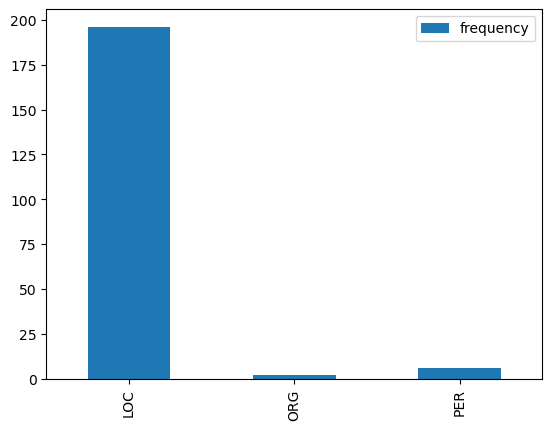

In [61]:
df.plot.bar(y = 'frequency')

In [62]:
named_entities_only = 0
for tags in values:
    if 'O\n' not in tags:
        named_entities_only += 1

In [63]:
named_entities_only

104

In [64]:
nr = 0
lengths = {}
for key, value in sents.items():
    nr += 1
    lengths[nr] = len(value)

In [65]:
data = {0: sents, 1: lengths}
df = pd.DataFrame.from_dict(data, orient="columns")
df.columns = ["sentence", "length"]
df['length'] = df['length'].astype('float')

In [66]:
df['length'].value_counts()

1.0     55
3.0     33
4.0     16
2.0     13
13.0     9
12.0     8
16.0     7
14.0     7
7.0      6
5.0      5
6.0      3
15.0     3
11.0     3
10.0     3
8.0      2
17.0     2
19.0     2
9.0      2
26.0     2
23.0     1
20.0     1
29.0     1
31.0     1
27.0     1
18.0     1
Name: length, dtype: int64

<AxesSubplot:ylabel='Frequency'>

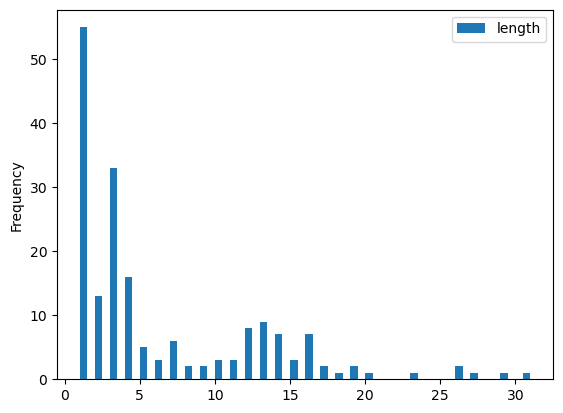

In [67]:
df.plot.hist(bins=60)